<a href="https://colab.research.google.com/github/Vaibhavi2135/Indian-Startup/blob/main/crop_recommendation_system_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/crop_recommendation system/Crop_recommendation.csv')
print(df.to_string())

        N    P    K  temperature   humidity        ph    rainfall        label
0      90   42   43    20.879744  82.002744  6.502985  202.935536         rice
1      85   58   41    21.770462  80.319644  7.038096  226.655537         rice
2      60   55   44    23.004459  82.320763  7.840207  263.964248         rice
3      74   35   40    26.491096  80.158363  6.980401  242.864034         rice
4      78   42   42    20.130175  81.604873  7.628473  262.717340         rice
5      69   37   42    23.058049  83.370118  7.073454  251.055000         rice
6      69   55   38    22.708838  82.639414  5.700806  271.324860         rice
7      94   53   40    20.277744  82.894086  5.718627  241.974195         rice
8      89   54   38    24.515881  83.535216  6.685346  230.446236         rice
9      68   58   38    23.223974  83.033227  6.336254  221.209196         rice
10     91   53   40    26.527235  81.417538  5.386168  264.614870         rice
11     90   46   42    23.978982  81.450616  7.50283

In [ ]:
!pip install gradio seaborn


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import gradio as gr


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/crop_recommendation system/Crop_recommendation.csv")
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print("Dataset Shape:", data.shape)
print("\nMissing Values:\n", data.isnull().sum())
print("\nCrop Distribution:\n", data['label'].value_counts())


Dataset Shape: (2200, 8)

Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Crop Distribution:
 label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


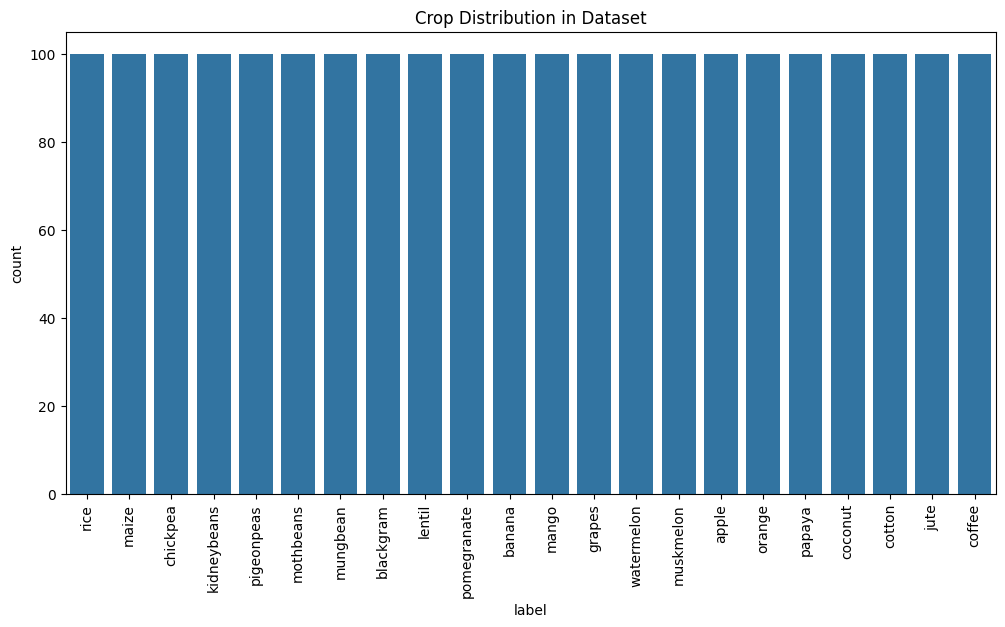

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='label', data=data)
plt.xticks(rotation=90)
plt.title("Crop Distribution in Dataset")
plt.show()


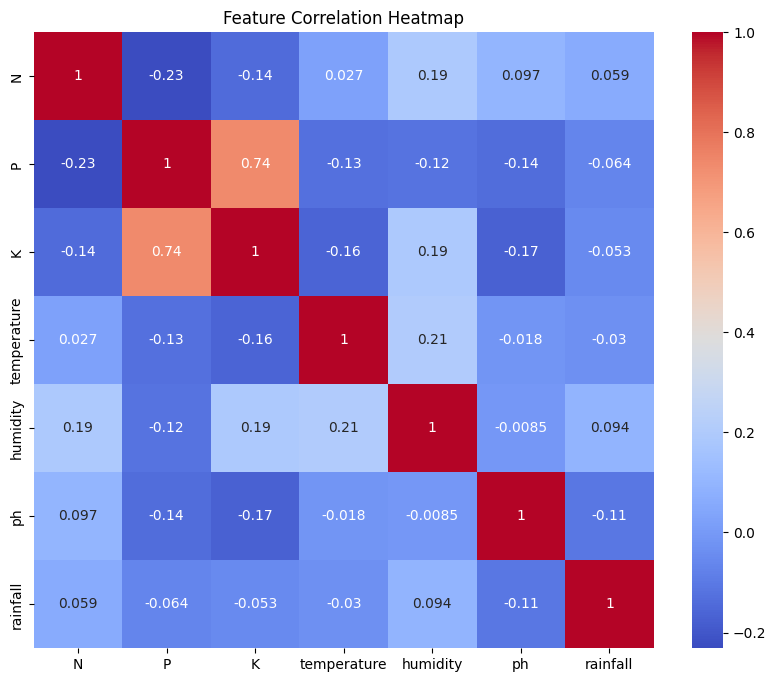

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.drop('label', axis=1).corr(),
            annot=True,
            cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
X = data.drop('label', axis=1)
y = data['label']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy * 90, "%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Model Accuracy: 89.38636363636364 %

Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1

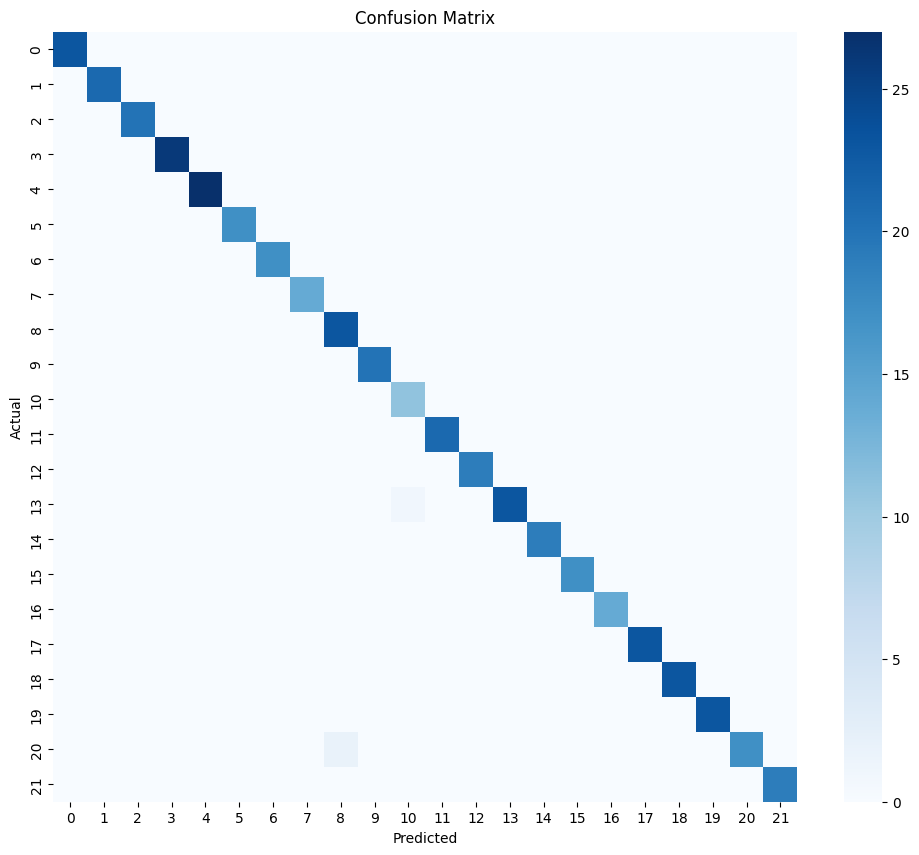

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


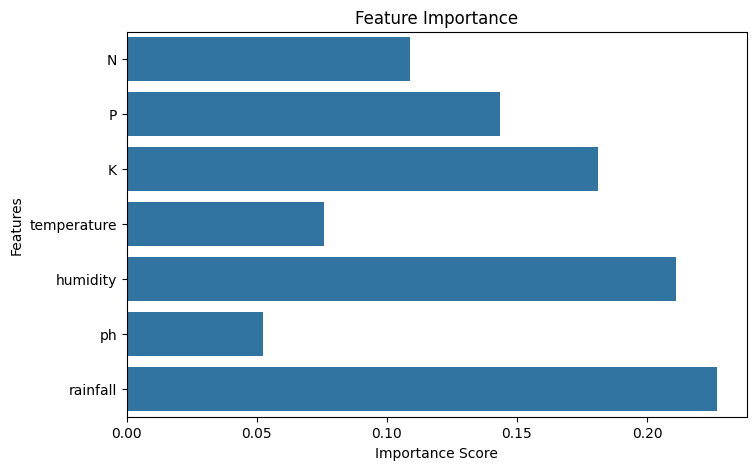

In [ ]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    input_data = scaler.transform(input_data)

    prediction = model.predict(input_data)[0]
    return f"🌱 Recommended Crop: {prediction}"


In [ ]:
interface = gr.Interface(
    fn=recommend_crop,
    inputs=[
        gr.Number(label="Nitrogen"),
        gr.Number(label="Phosphorus"),
        gr.Number(label="Potassium"),
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity (%)"),
        gr.Number(label="pH"),
        gr.Number(label="Rainfall (mm)")
    ],
    outputs=gr.Textbox(label="Crop Recommendation"),
    title="🌾 Crop Recommendation System",
    description="Enter soil and climate parameters to get the best crop recommendation"
)


In [ ]:
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b1fb8c9da32deb6d53.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
